<a href="https://colab.research.google.com/github/khiemtranngoc/Coursera_course_recomendation_system/blob/main/Recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [92]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Coursera.csv")

In [94]:
df.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [95]:
df.shape

(3522, 7)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [97]:
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [98]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [99]:
level = df["Difficulty Level"].value_counts()

# Reset the index to convert the Series to a DataFrame and give appropriate column names
level_df = level.reset_index()
level_df.columns = ["level", "total_course"]

In [100]:
level_df

,level,total_course
0,Beginner,1444
1,Advanced,1005
2,Intermediate,837
3,Conversant,186
4,Not Calibrated,50


<ipython-input-102-029bde6ff0d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='level', y='total_course', data= level_df, palette='viridis')


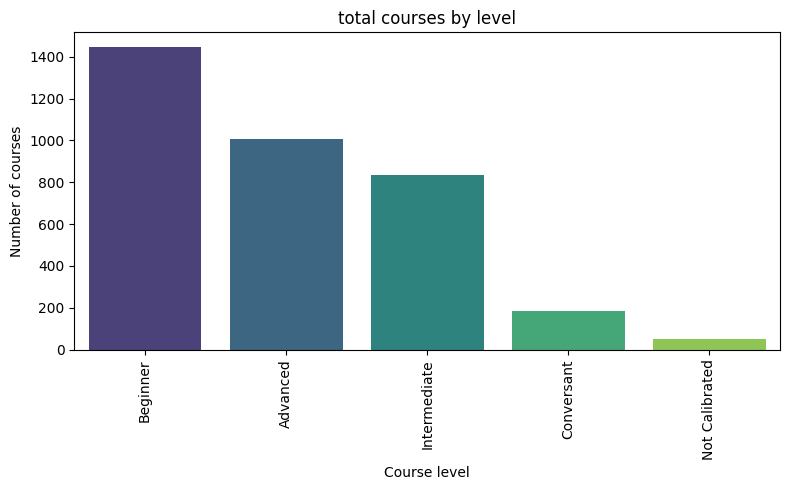

In [102]:
# Plot using seaborn
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='level', y='total_course', data= level_df, palette='viridis')

# Improve the visualization
plt.xticks(rotation=90)
plt.title('total courses by level')
plt.xlabel('Course level')
plt.ylabel('Number of courses')
plt.tight_layout()

# Show the plot
plt.show()

In [103]:
titles = " ".join(title for title in df['Course Description'].astype(str))

In [104]:
# English Stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "course", "will", "learn", "end", "introduction", "basic", "project", "information", "will", "experience"])

In [105]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [106]:
wordcloud.generate(titles)

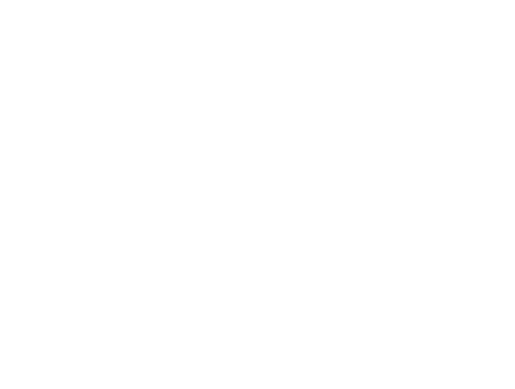

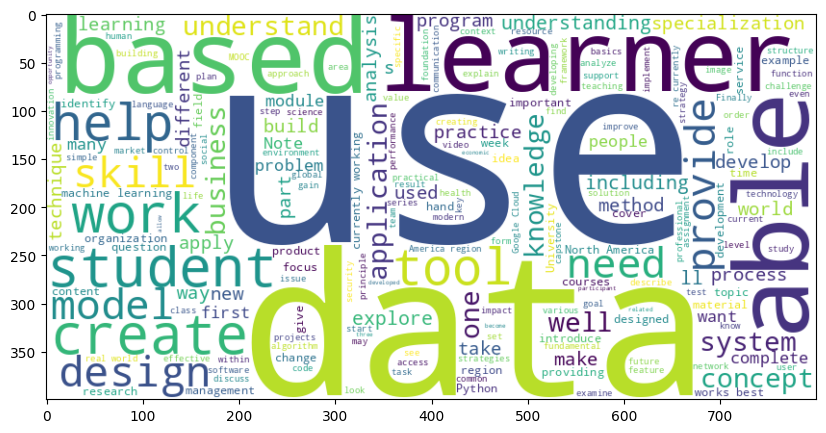

In [107]:
plt.axis("off")
plt.figure(figsize=(10,5))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [108]:
skills_description = " ".join(title for title in df['Skills'].astype(str))

In [109]:
wordcloud.generate(skills_description)

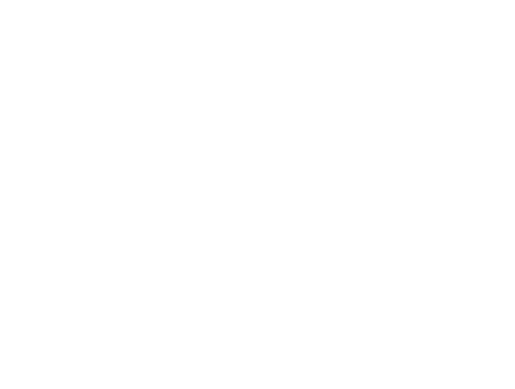

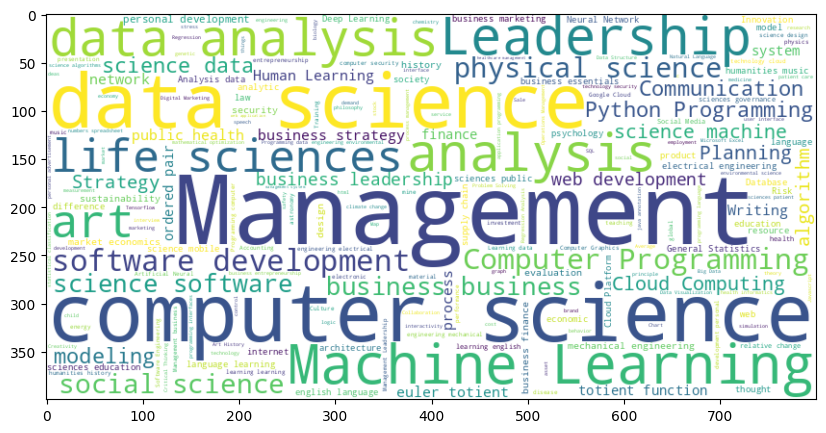

In [110]:
plt.axis("off")
plt.figure(figsize=(10,5))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [111]:
data = df[['Course Name','Difficulty Level','Course Description','Skills','University']]

In [112]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills,University
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Michigan State University
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Coursera Project Network
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,�cole Polytechnique
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,IESE Business School
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Coursera Project Network


In [113]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text_nltk(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Filter out punctuation and stop words
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]

    # Join words back to string
    cleaned_text = " ".join(filtered_text)

    return cleaned_text

# Apply the cleaning function to your DataFrame columns
data['Course Description'] = data['Course Description'].apply(clean_text_nltk)
data['Skills'] = data['Skills'].apply(clean_text_nltk)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-113-a90ba57e03c0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Description'] = data['Course Description'].apply(clean_text_nltk)
<ipython-input-113-a90ba57e03c0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Skills'] = data['Skills'].apply

In [114]:
data.head()

,Course Name,Difficulty Level,Course Description,Skills,University
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write Full Length Feature Film Script In cours...,Drama Comedy peering screenwriting film Docume...,Michigan State University
1,Business Strategy: Business Model Canvas Analy...,Beginner,By end guided project fluent identifying creat...,Finance business plan persona user experience ...,Coursera Project Network
2,Silicon Thin Film Solar Cells,Advanced,This course consists general presentation sola...,chemistry physics Solar Energy film lambda cal...,�cole Polytechnique
3,Finance for Managers,Intermediate,When comes numbers always meets eye In operati...,accounts receivable dupont analysis analysis A...,IESE Business School
4,Retrieve Data using Single-Table SQL Queries,Beginner,In course learn effectively retrieve data rela...,Data Analysis select sql database management s...,Coursera Project Network


In [115]:
data['Course Name'] = data['Course Name'].apply(lambda x: x.replace(' ', ',').replace(',,', ',').replace(':', ''))

data['Course Description'] = data['Course Description'].apply(lambda x: x.replace(' ', ',')
                                                              .replace(',,', ',')
                                                              .replace('_', '')
                                                              .replace(':', '')
                                                              .replace('(', '')
                                                              .replace(')', ''))

data['Skills'] = data['Skills'].apply(lambda x: x.replace('(', '').replace(')', ''))

<ipython-input-115-4138fab64771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Name'] = data['Course Name'].apply(lambda x: x.replace(' ', ',').replace(',,', ',').replace(':', ''))
<ipython-input-115-4138fab64771>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Description'] = data['Course Description'].apply(lambda x: x.replace(' ', ',')
<ipython-input-115-4138fab64771>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [116]:
data.head()

,Course Name,Difficulty Level,Course Description,Skills,University
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,Full,Length,Feature,Film,Script,In,cours...",Drama Comedy peering screenwriting film Docume...,Michigan State University
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,end,guided,project,fluent,identifying,creat...",Finance business plan persona user experience ...,Coursera Project Network
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,general,presentation,sola...",chemistry physics Solar Energy film lambda cal...,�cole Polytechnique
3,"Finance,for,Managers",Intermediate,"When,comes,numbers,always,meets,eye,In,operati...",accounts receivable dupont analysis analysis A...,IESE Business School
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,course,learn,effectively,retrieve,data,rela...",Data Analysis select sql database management s...,Coursera Project Network


In [117]:
data['Tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']+ data["University"]

<ipython-input-117-7ca6bf83080c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']+ data["University"]


In [118]:
new_df = data[['Course Name','Tags']]

In [119]:
new_df.head()

,Course Name,Tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,comes,num..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [120]:
new_df['Tags'] = data['Tags'].str.replace(',',' ')
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')

<ipython-input-120-94354c8ff316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = data['Tags'].str.replace(',',' ')
<ipython-input-120-94354c8ff316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = data['Course Name'].str.replace(',',' ')


In [121]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

<ipython-input-121-626a084aa76c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [122]:
new_df['course_name'] = new_df['course_name'].apply(lambda x:x.lower())
new_df['Tags'] = new_df['Tags'].apply(lambda x:x.lower())

<ipython-input-122-6c6a6540076c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['course_name'] = new_df['course_name'].apply(lambda x:x.lower())
<ipython-input-122-6c6a6540076c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x:x.lower())


In [123]:
new_df.head()

,course_name,Tags
0,write a feature length screenplay for film or ...,write a feature length screenplay for film or ...
1,business strategy business model canvas analys...,business strategy business model canvas analys...
2,silicon thin film solar cells,silicon thin film solar cellsadvancedthis cour...
3,finance for managers,finance for managersintermediatewhen comes num...
4,retrieve data using single-table sql queries,retrieve data using single-table sql queriesbe...


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
cv = CountVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2),
                     min_df=0.01, max_df=0.7, tokenizer=word_tokenize, binary=False)

In [126]:
vectors = cv.fit_transform(new_df['Tags']).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [127]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    # Ensure text is a string and not missing
    if not isinstance(text, str):
        return ""

    y = [ps.stem(i) for i in text.split()]  # List comprehension is often slightly faster
    return " ".join(y)


new_df['Tags'] = new_df['Tags'].apply(stem)

<ipython-input-127-09cefcf1abef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(stem)


In [128]:
new_df.head()

,course_name,Tags
0,write a feature length screenplay for film or ...,write a featur length screenplay for film or t...
1,business strategy business model canvas analys...,busi strategi busi model canva analysi with mi...
2,silicon thin film solar cells,silicon thin film solar cellsadvancedthi cours...
3,finance for managers,financ for managersintermediatewhen come numbe...
4,retrieve data using single-table sql queries,retriev data use single-t sql queriesbeginneri...


In [129]:
from sklearn.metrics.pairwise import cosine_similarity

In [130]:
similarity = cosine_similarity(vectors)

In [131]:
def recommend(course):
    course_indices = new_df[new_df['course_name'].str.lower() == course.lower()].index
    if course_indices.size > 0:
        course_index = course_indices[0]
        distances = similarity[course_index]
        course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        for i in course_list:
            print(new_df.iloc[i[0]].course_name)
    else:
        print("Course not found. Please check the course name.")

In [132]:
recommend('Finance for Managers')

analysis of business problems
strategic business management - macroeconomics
operations management analysis and improvement methods
corporate finance know your numbers 2
strategic business management - microeconomics
fundamentals of financial and management accounting


## Updated new recomendation system

The recomend_2 would be more user friendlly, we just need to type a keyword and the would get the results not like in the first recomend function, where we have to type in exactly course name.

In [133]:
! pip install fuzzywuzzy

In [147]:
def recommend_2():
    keyword = input("Type what you want to learn: ")

    # Finding the course that best matches the keyword
    titles = new_df['course_name'].tolist()
    best_match, best_match_score = process.extractOne(keyword, titles)

    if best_match:  # Ensure a best match was found
        course_index = new_df[new_df['course_name'] == best_match].index[0]
        distances = similarity[course_index]
        course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_titles = set()  # Use a set to track titles and avoid duplicates
        print(f"\nHere are your recomendated courses: \n")
        for i in course_list:
            course_title = new_df.iloc[i[0]].course_name
            if course_title not in recommended_titles:  # Check if the course has already been recommended
                print(course_title)
                recommended_titles.add(course_title)  # Add to the set of recommended titles
    else:
        print("No matching course found. Please try again with different keywords.")

# Call the recommend function to start the interactive session
#recommend()

In [150]:
recommend_2()

Type what you want to learn: Python

Here are your recomendated courses: 

python data representations
python data analysis
python basics
python functions files and dictionaries
python programming a concise introduction
programming for everybody (getting started with python)
